## Data Visualization

Before diving into the modeling phase, we will create visualizations to uncover trends within the dataset. The main focus was on visualizing price as the dependent variable, with waterfront and condition as the independent categorical variables. Additionally, we will explore Bedrooms, Bathrooms, sq_liv, and sq_lot as our independent numerical variables. These visualizations were essential in understanding the dynamics of the data and identifying key factors influencing property prices.

#### Univariate Analysis

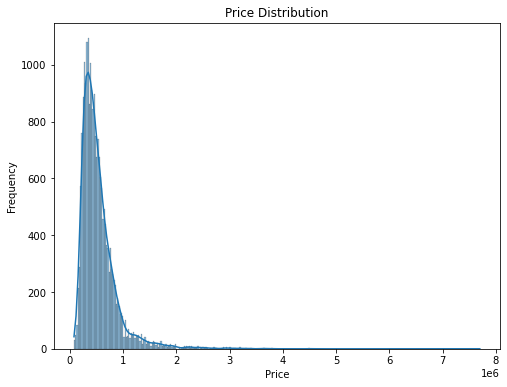

In [31]:
# Histogram of 'price' as dependent variable 
plt.figure(figsize=(8, 6))
sns.histplot(data=kc_data_df, x='price', kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram of 'price' reveals a positively skewed distribution, indicating that a significant number of properties have lower prices while fewer properties command higher prices. To address this skewness and achieve a more symmetrical distribution, we will do a log transformation.

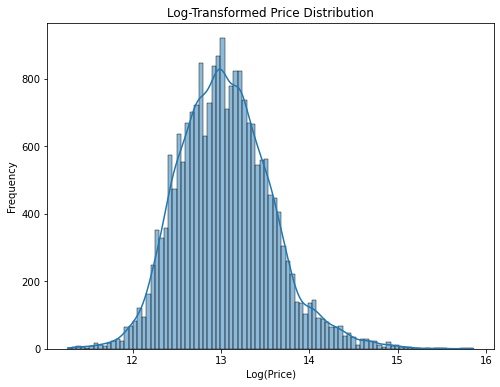

In [32]:
#log tranformation for 'price'
kc_data_df['price_log'] = np.log(kc_data_df['price'])

# Plot histogram of the transformed 'price'
plt.figure(figsize=(8, 6))
sns.histplot(data=kc_data_df, x='price_log', kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

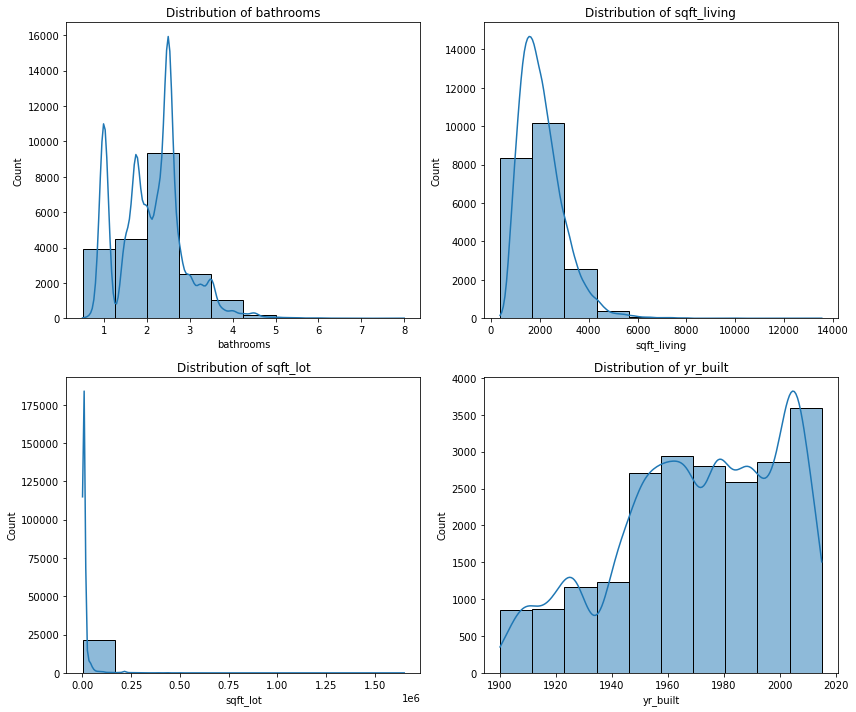

In [33]:
#the independent variables
num = ['bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']
# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through each numeric variable and create a distplot
for i, col in enumerate(num):
    sns.histplot(data=kc_data_df[col], ax=axes[i//2, i%2], bins=10, kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

#### Log Transformation for the independent variables

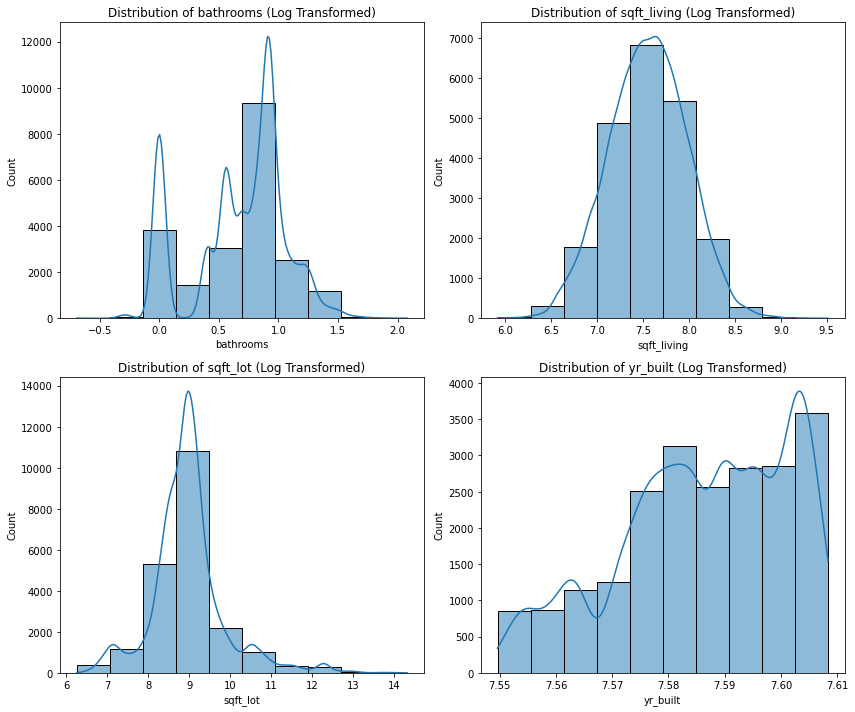

In [34]:
# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through each numeric variable, log-transform, and create a distplot
for i, col in enumerate(num):
    # Log-transform the variable
    log_values = np.log(kc_data_df[col])
    
    # Plot the log-transformed variable
    sns.histplot(data=log_values, ax=axes[i//2, i%2], bins=10, kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {col} (Log Transformed)')

# Adjust layout
plt.tight_layout()
plt.show()

#### Bivariate Analysis 

Next we will be checking the relationship between price and the numeric independent variables that we will be using.

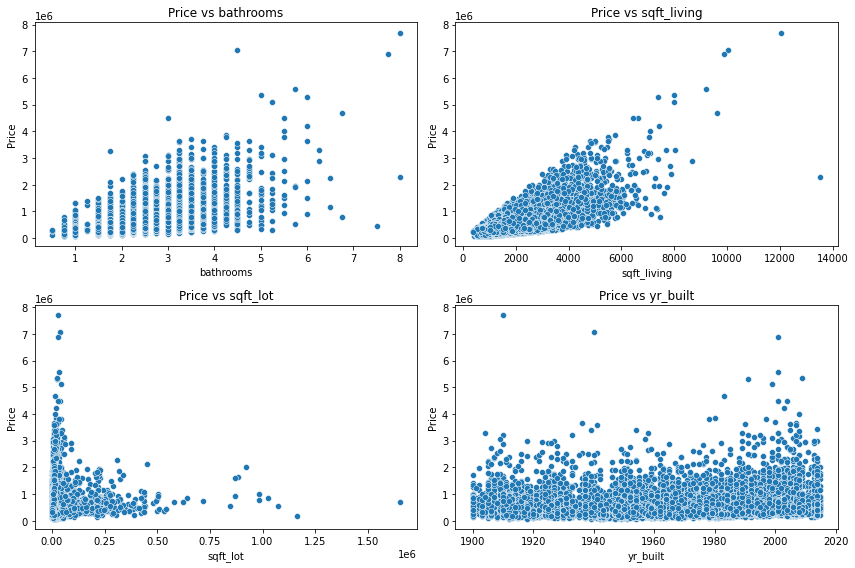

In [35]:
# bivariate analysis for the numerical independent variables
plt.figure(figsize=(12, 8))

for var in num:
    plt.subplot(2, 2, num.index(var) + 1)
    sns.scatterplot(x=var, y='price', data=kc_data_df)
    plt.title(f'Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

Only bathrooms and sqft_living have a linear relationship with price 

#### Categorical Variables

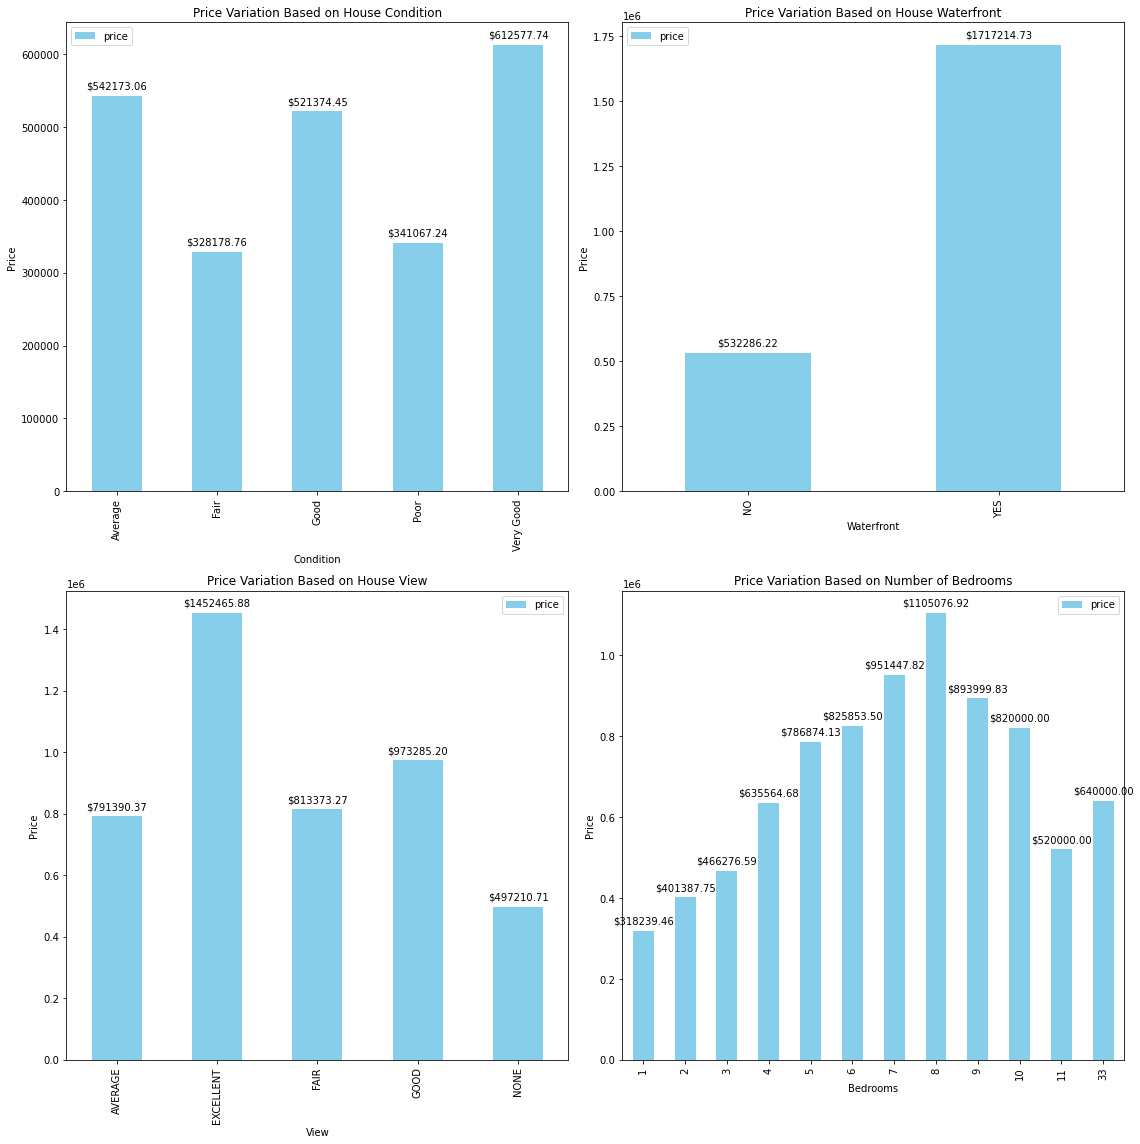

In [36]:
# Define the plots to be created
plots = [
    ('Price Variation Based on House Condition', 'condition', 'Price'),
    ('Price Variation Based on House Waterfront', 'waterfront', 'Price'),
    ('Price Variation Based on House View', 'view', 'Price'),
    ('Price Variation Based on Number of Bedrooms', 'bedrooms', 'Price')
]

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the plots and create bar plots for each
for i, (title, x_col, y_col) in enumerate(plots):
    # Calculate the average price for each group
    avg_prices = kc_data_df.groupby(x_col)['price'].mean()
    
    # Convert the series to a DataFrame for plotting
    avg_prices_df = avg_prices.reset_index()
    
    # Create a bar plot for the current plot using Pandas' plot function
    avg_prices_df.plot.bar(x=x_col, y='price', ax=axes[i], color='skyblue', edgecolor='none')
    
    # Set the title, x-axis label, and y-axis label for the current subplot
    axes[i].set_title(title)
    axes[i].set_xlabel(x_col.capitalize())
    axes[i].set_ylabel(y_col)

    # Add value labels on top of each bar
    for p in axes[i].patches:  # Loop for each patch (bar) in the current subplot axes[i]
        # Add an annotation to the current subplot
        axes[i].annotate(f"${p.get_height():.2f}",  # Format the annotation with two decimal places and a dollar sign
                         (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the annotation at the top center of each bar
                         ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')  # Annotation properties

# Adjust the layout of the subplots for better visualization
plt.tight_layout()
plt.show()


In [37]:
kc_data_df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

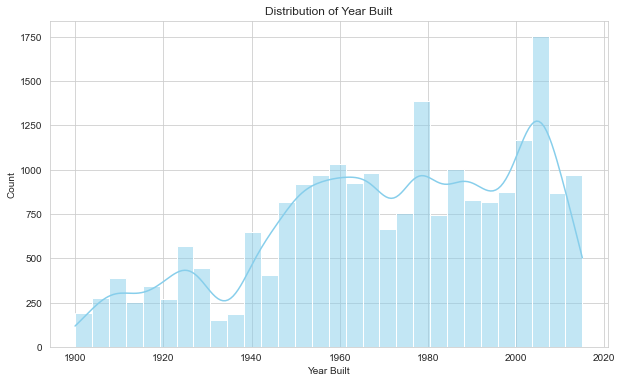

In [38]:
# Set the style for the plots
sns.set_style("whitegrid")

# Create a histogram for 'yr_built'
plt.figure(figsize=(10, 6))
sns.histplot(data=kc_data_df, x='yr_built', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.show()

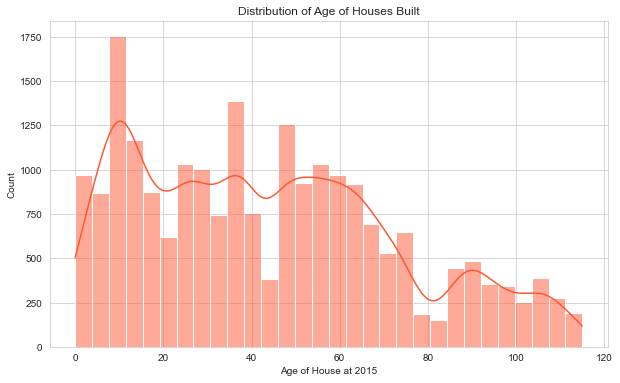

In [41]:
# Set the style for the plots
sns.set_style("whitegrid")

# Define the color you want to use
custom_color = '#FF5733'  # Example custom color (orange)

# Create a bar plot for the distribution of 'age_built' with the custom color
plt.figure(figsize=(10, 6))
sns.histplot(data=kc_data_df, x='age_built', bins=30, kde=True, color=custom_color)
plt.title('Distribution of Age of Houses Built')
plt.xlabel('Age of House at 2015')
plt.ylabel('Count')
plt.show()

#### Correlation

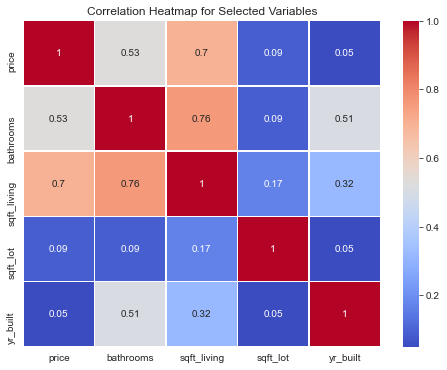

In [40]:
# Define the variables you want to include in the correlation matrix
selected_vars = ['price','bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']

# Compute correlation matrix for the selected variables
corr_matrix_selected = kc_data_df[selected_vars].corr()
rounded_corr_matrix_selected = np.round(corr_matrix_selected, 2)

# Plot the correlation heatmap for the selected variables
plt.figure(figsize=(8, 6))
sns.heatmap(rounded_corr_matrix_selected, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Selected Variables')
plt.show()
